#Imports

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as py
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.optim as optim

#Data transformation class

In [20]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

#Loading the dataset

In [21]:
train_data = datasets.Flowers102(root='./data', split='train', download=True, transform=transform)
val_data = datasets.Flowers102(root='./data', split='val', download=True, transform=transform)
test_data = datasets.Flowers102(root='./data', split='test', download=True, transform=transform)

#Get one of the images to help visualise

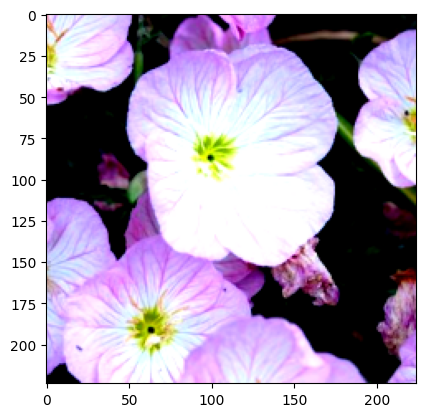

In [22]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
dataiter = iter(train_data)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))

#Defining and initialising the NN

In [26]:
class My_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

classifier = My_NN()


#Defining loss function and optimizer

In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classifier.parameters(), lr=0.01)

#Training the network